<a href="https://colab.research.google.com/github/aiaurora/Lobe-TFLitewebcam-test-TFLite/blob/main/lobe_python_2(webcam%E6%8B%8D%E7%85%A7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

加入LOBE的Libraries

In [ ]:
#執行完這一行，要記得restart runtime!!
!pip install git+https://github.com/lobe/lobe-python

  Cloning https://github.com/lobe/lobe-python to /tmp/pip-req-build-ty854_62
  Running command git clone -q https://github.com/lobe/lobe-python /tmp/pip-req-build-ty854_62
     |████████████████████████████████| 1.2 MB 21.9 MB/s 


連結雲端硬碟(授權)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#進行授權

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


確認目錄內容

In [ ]:
import os
path = '/content/drive/MyDrive/Colab Notebooks/LOBE/2'  #切換目錄
os.chdir(path)
os.listdir()  #確認目錄內容

['test_photo.jpg', 'labels.gdoc', 'signature.json', 'saved_model.tflite']

**Colab 拍照模組**(要用WebCam，目前只可用JavaScript來處理)Colab code snippets

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='test_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '點擊擷取';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // 等待'點擊擷取'
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

來拍照了!Colab code snippets

<IPython.core.display.Javascript object>

Saved to test_photo.jpg


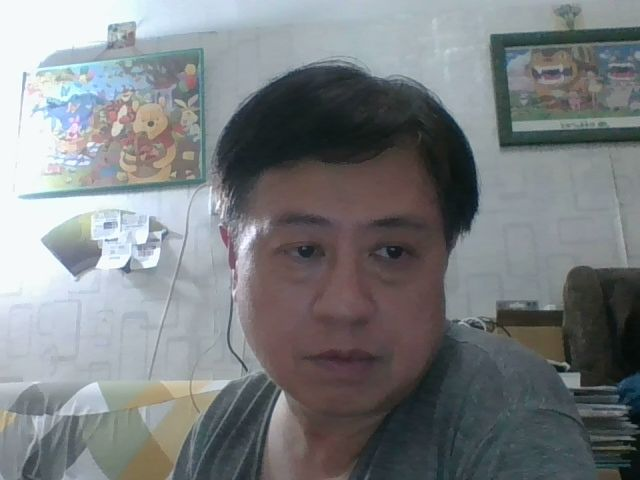

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

使用LOBE TFLite Model進行預測

沒眼鏡: 99.09887909889221%
戴眼鏡: 0.8970832452178001%
無人: 0.004038031329400837%


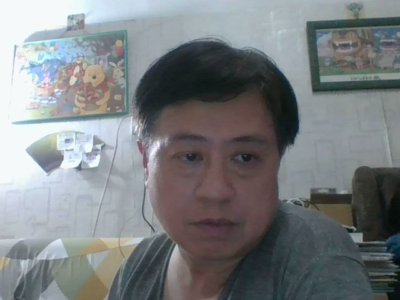

In [ ]:
#import tensorflow as tf
from PIL import Image
from lobe import ImageModel

width = 400
im1 = Image.open(path+ '/test_photo.jpg')
ratio = float(width)/im1.size[0]
height = int(im1.size[1]*ratio)
im1a = im1.resize( (width, height), Image.BILINEAR )

model = ImageModel.load(path)
result1 = model.predict_from_file(path+ '/test_photo.jpg')

# Print all classes
for label, confidence in result1.labels:
    print(f"{label}: {confidence*100}%")
im1a.show()